In [108]:
#references
# https://pixspy.com/
# https://blog.csdn.net/xufive/article/details/112308533
# https://tw511.com/a/01/36832.html
# https://auzhu.com/sports/1025003.html

In [109]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [110]:
def reduce_highlights(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    ret, thresh = cv2.threshold(img_gray, 200, 255, 0)  
    contours, hierarchy  = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_zero = np.zeros(img.shape, dtype=np.uint8) 
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) 
        img_zero[y:y+h, x:x+w] = 0 
        mask = img_zero     
    
    result = cv2.illuminationChange(img, mask, alpha=0.2, beta=0.4) 
    
    return result

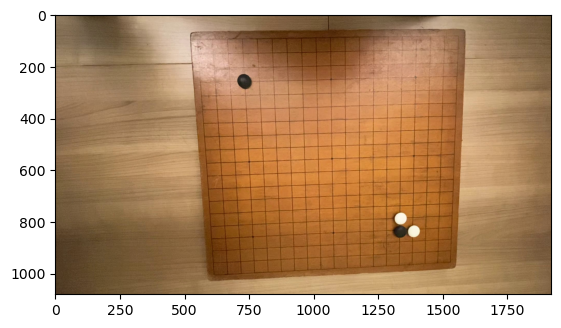

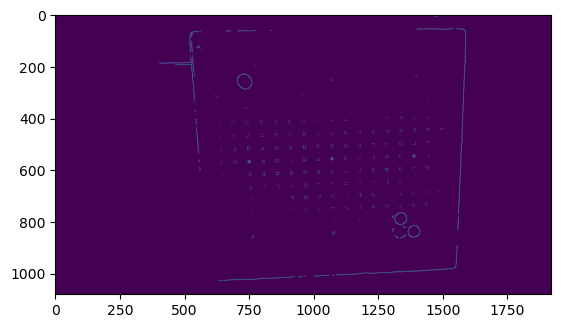

In [111]:
# 320 (hand occlusion case)

img = cv2.imread('./data/frame550.jpg')
orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = reduce_highlights(orig_img)

gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9,9), 3)
gray = cv2.Canny(gray, 70, 70)

plt.imshow(img)
plt.show()

# plt.imshow(gray)
# plt.show()